In [2]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import scipy.stats as stats

from tqdm import tqdm

from caching import *

100%|██████████| 100000/100000 [00:10<00:00, 9715.00it/s]


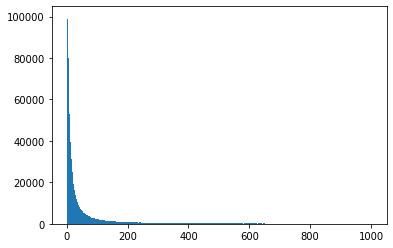

In [3]:
user_num = 100000
itemset_len = 1000
data_len = 20
a = 1.5
x = np.arange(1, itemset_len+1)
data = zipf_generation(a, x, user_num, data_len, rate=True)
plt.hist(data.flatten(), bins=np.arange(1, itemset_len+2))
plt.show()

100%|██████████| 100000/100000 [00:10<00:00, 9765.50it/s]


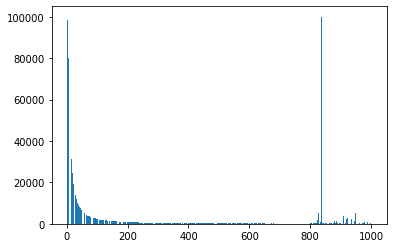

100%|██████████| 100000/100000 [00:10<00:00, 9594.09it/s]


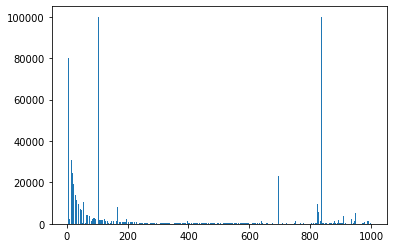

100%|██████████| 100000/100000 [00:10<00:00, 9636.15it/s]


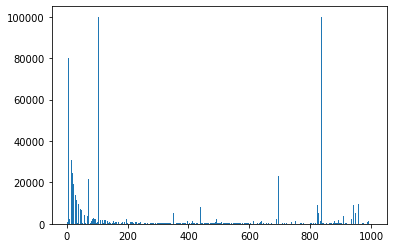

100%|██████████| 100000/100000 [00:10<00:00, 9651.60it/s]


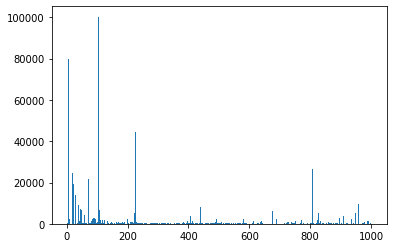

100%|██████████| 100000/100000 [00:10<00:00, 9749.73it/s]


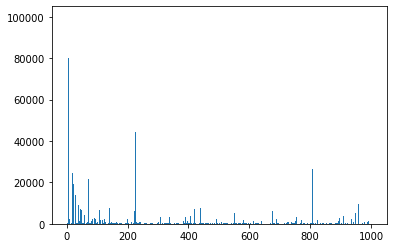

100%|██████████| 100000/100000 [00:10<00:00, 9700.45it/s]


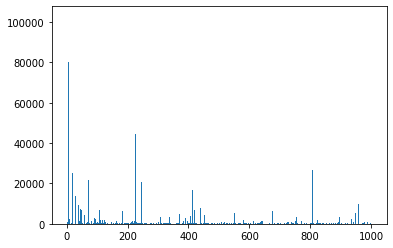

100%|██████████| 100000/100000 [00:10<00:00, 9722.44it/s]


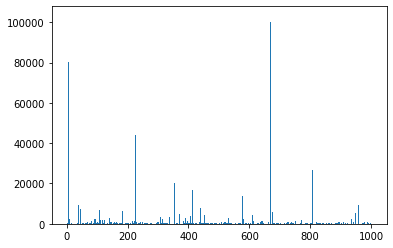

100%|██████████| 100000/100000 [00:10<00:00, 9800.39it/s]


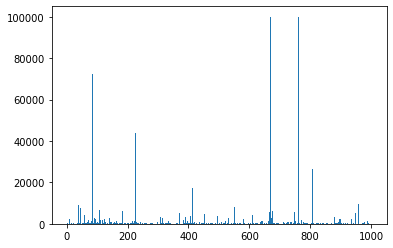

100%|██████████| 100000/100000 [00:10<00:00, 9746.21it/s]


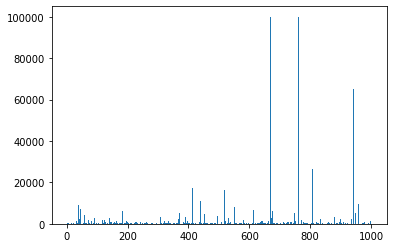

100%|██████████| 100000/100000 [00:10<00:00, 9872.86it/s]


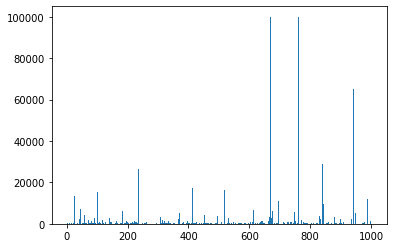

In [5]:
p = 0.2
for _ in range(10): 
    transition(x, p)
    data = zipf_generation(a, x, user_num, data_len, rate=True)
    plt.hist(data.flatten(), bins=np.arange(1, itemset_len+2))
    plt.show()

In [ ]:
itemset_len = 1000
k = 30

epsilon = 2
omega = 10

t = 1

data = np.load('./data/zipf_500000_1.npy')
user_num, data_len = data.shape
# budgets = np.random.choice(a=[0.1, 1], size=500000, p=[0.1, 0.9])
budgets = np.random.choice(a=(np.arange(omega)+1)*epsilon/omega, size=500000, p=[0.1]*10)
# budgets = np.zeros(user_num)
# for i in range(1, omega+1):
#     print('Privacy budget:', epsilon*i/omega, 'Range:', int(user_num*(i-1)/omega), '-', int(user_num*i/omega))
#     budgets[int(user_num*(i-1)/omega):int(user_num*i/omega)] = epsilon*i/omega

true_freq = calc_freq(data, itemset_len)
true_top_k = calc_top_k(true_freq, k)
oracle_CHR = calc_CHR(true_freq, true_top_k)
print('oracle_CHR:', oracle_CHR)

episodes = 10
results = np.zeros(episodes, dtype=int)
for i in range(episodes):
    print(f'================== EPISODE {i+1} ==================')
    # freq = personalized_frequency_estimation_sample(data, itemset_len, budgets, t)
    freq = personalized_frequency_estimation(data, itemset_len, budgets)

    top_k = calc_top_k(freq, k)
    results[i] = len(set(top_k) & set(true_top_k))

    print('final_correct_num:', results[i])
    print('LDP_CHR:', calc_CHR(true_freq, top_k))
print('mean_correct_num:', results.mean())

In [ ]:
import torch
a = torch.tensor([[4, 3], [1, 2]])
print(a)
torch.argmax(a, dim=1)

In [ ]:
itemset_len = 5
regime_num = 2
regime_freq = np.random.rand(regime_num, itemset_len)
freq = np.zeros(itemset_len)
for i in range(itemset_len):
    freq[i] = np.dot(weight, regime_freq[:, i])
print(freq)
print(np.dot(weight, regime_freq))

In [7]:
a = np.arange(25).reshape((5, 5))
print(a[:, 0])
print(a.sum(1)-a[:,0])


[ 0  5 10 15 20]
[10 30 50 70 90]


In [7]:
import torch
a = [1, 1, 3]
b = [2, 2, 4]
np.dstack((a,b))
epsilon = 5
action_space_dim = 10
(math.exp(epsilon/4)-1)/(math.exp(epsilon/4)+action_space_dim-1)

0.19938147142501708